<div class="alert alert-success">
<strong>Assignment 3</strong>
    
     Trie Trees and Auto-Complete Bots

</div>

In this assignment, you will utilise a new tree-based data structure to build an auto-complete engine.
Important notes:
> - Watch [this video](https://bit.ly/3HKtdbw) recorded by Joram Erbarth (M23) with advice on how to prepare for CS110 assignments. Most of the suggestions will also apply to other CS courses, so make sure to bookmark this video for future reference. 
> - Make sure you fill in any place that says `###YOUR DOCSTRING HERE`, `###YOUR CODE HERE` or `"YOUR ANSWER HERE"`.
> - Feel free to add more cells (Markdown and coding) to the ones always provided in each question to expand your answers, as needed. 
> - Given the Covid-19 pandemic, please follow all the local guidelines rigorously.
> - Please be aware of the weight of this assignment which should reflect both time and effort management. Please plan accordingly.
> - Please refer to the [CS110 course guide](https://drive.google.com/file/d/15qthc1zdBTcb7I0BhYjy0O0p186KwmG3/view?usp=sharing) on how to submit your assignment materials.
> - Do not submit code screenshots. Instead, your PDF should originate from a well-presented Jupyter notebook. You will receive an overall grade on #professionalism.
> - If you have any questions, do not hesitate to reach out to the TAs in the Slack channel `#cs110-algo`, or come to the instructors' OHs.



🏁 **Setting up:**

Start by stating your name and identifying your collaborators. Please comment on the nature of the collaboration (for example, if you briefly discussed the strategy to solving problem 1, say so, and explicitly point out what exactly did you discuss). 

<div class="alert alert-warning">
<strong> Name:</strong> Rhali Attar
    <hr>
<strong>Collaborators: </strong> None
    <hr>
<strong>Details: </strong> N/A
</div>

## An Overview

Auto-completion functionalities are now ubiquitous in search engines, document editors, and messaging apps. How would you develop an algorithmic strategy from scratch to implement these computational solutions? In this assignment, you will learn about a new data structure and use it to build a very simple auto-complete engine. Each question in the assignment guides you closer to that objective while encouraging you to contrast this novel data structure to the other ones discussed in class.

A [trie tree](https://en.wikipedia.org/wiki/Trie), or a prefix tree, is a common data structure that stores a set of strings in a collection of nodes so that all strings with a common prefix are found in the same branch of the tree. Each node is associated with a letter, and as you traverse down the tree, you pick up more letters, eventually forming a word. Complete words are commonly found on the leaf nodes. However, some inner nodes can also mark full words.

Let’s use an example diagram to illustrate several important features of tries:

In [1]:
from IPython.core.display import Image, display
display(Image(url='https://drive.google.com/uc?id=1NxHPsTzU3xEz2Ivck1NyqKpOix4Sc5iE', width=200))

Here are a few things to note from the schematics above:

- Nodes that mark valid words are marked in yellow. Notice that while all leaves are considered valid words, only some inner nodes contain valid words, while some remain only prefixes to valid words appearing down the branch.

- The tree does not have to be balanced, and the height of different branches depends on its contents.

- In our implementation, branches never merge to show common suffixes (for example, both ANT and ART end in T, but these nodes are kept separate in their respective branches). However, this is a standard first line of memory optimization for tries.

- The first node contains an empty string; it “holds the tree together.”

Your task in this assignment will be to implement a functional trie tree. You will be able to insert words into a dictionary, lookup valid and invalid words, print your dictionary in alphabetical order, and suggest appropriate suffixes like an auto-complete bot.

The assignment questions will guide you through these tasks one by one. To stay safe from breaking your own code, and to reinforce the idea of code versioning, under each new question first **copy your previous (working) code**, and only then **implement the new feature**. The code skeletons provided throughout will make this easier for you at the cost of repeating some large portions of code.

## Q1—Python implementation of a trie tree

In this question, you will write Python code that can take a set/list/tuple of strings and:
- insert them into a trie tree and 
- lookup whether a specific word/string is present in the trie tree.

### **A.** Theoretical pondering
You might recall two main approaches to building trees from class: making separate **Tree and Node** classes, or only making a **Node** class. Which method do you think is a better fit for trie trees, and why? Justify your reasoning in around 100 words (provide a word count).
Throughout the assignment, you will use your chosen approach, so don't rush this question.

The most appropriate method is to create two separate classes for multiple reasons. Firstly, this allows us to differentiate between properties of individual nodes and trees. Indeed, here, nodes would have attributes such as the letters, the children and whether they are the end of a word and trees would have a root and a word list. However, if we only had a single node class, we would need to incorporate the tree attributes separately, which would decrease the code readability. Moreover, there will be issues with the root node because an empty Trie tree has a single empty root node, which would require additional code to always implement when using a single Node class (since a root cannot simply be an attribute of a Node). Lastly, by using two classes, we are allowing for much more code reusability. For example, the Node class could easily be reused for any other type of tree with only a few simple edits on relevant attributes necessary; or the general structure of the Trie class could be reused as most trees require similar insertion methods.

Word count = 184

### **B.** Practical implementation
In the two cells below, there are two code skeletons. 

> - Depending on your answer to question **A**, either implement a `Node` and a `Trie` class or implement a `Node` class. **Choose the corresponding code cell and delete the other one.**
> - For your class(es), write `insert()` and `lookup()` methods, which will insert a word into the trie tree and look it up, respectively. Use the code skeleton and examine the specifications of its docstrings to guide you on the details of inputs and outputs to each method.
> - If you are coding two classes, your Trie class should, upon initiation, create the root Node. If you are coding a single class, use an attribute to mark the root node.
> - Finally, ensure that the trie can be initiated with a wordbank as an input. This means that a user can create a trie and feed it an initial set of words at the same time (like in the tests below), which will be automatically inserted into the trie upon its creation. Likely, this will mean that your `__init__()` has to make some calls to your `insert()` method.
> - Several test cases have been provided for your convenience, and these include some, but not all, possible edge cases. If the implementation is correct, your code will pass all the tests. Note: there are several ways in which we can condense the text cleaning syntax that we have provided for you without repeating the method `replace()` multiple times. However, we are leaving it this way for clarity.
> - In addition, create **at least three more tests** to demonstrate that your code is working correctly and **justify** why such test cases are appropriate.

In [2]:
# VERSION 1 - Node + Trie classes

class Node:
    """This class represents one node of a trie tree.
    
    Parameters
    ----------
    The parameters for the Node class are not predetermined.
    However, you will likely need to create one or more of them.
    """

    def __init__(self, letter):
        self.letter = letter
        self.children = []
        self.is_a_word = False
        
class Trie:
    """This class represents the entirety of a trie tree.
    
    Parameters
    ----------
    The parameters for Trie's __init__ are not predetermined.
    However, you will likely need one or more of them.    
    
    Methods
    -------
    insert(self, word)
        Inserts a word into the trie, creating nodes as required.
    lookup(self, word)
        Determines whether a given word is present in the trie.
    """
    
    def __init__(self, word_list = None):
        """Creates the Trie instance, inserts initial words if provided.
        
        Parameters
        ----------
        word_list : list
            List of strings to be inserted into the trie upon creation.
        """
        self.root = Node('')
        self.word_list = word_list
        
        #if there is a word list, insert it
        if self.word_list:
            self.insert(word_list)
                
            
    def insert(self, words):
        """Inserts a word into the trie, creating missing nodes on the go.
        
        Parameters
        ----------
        word : str
            The word to be inserted into the trie.
        """
        #if there is a single word, turn it into a list with one element
        if type(words) == str:
            words = [words]
        
        for word in words:
            #make the word lower case
            word = word.lower()
            #initialize the current node
            current_node = self.root

            #check every letter of the word
            for letter in range(len(word)):

                #initialize the letter not being a child of the current node
                already_a_child = False

                #check all the children of the current node
                for child in current_node.children:
                    #if a letter is already a child, update the already a child variable
                    #and check that node next
                    if word[letter] == child.letter:
                        already_a_child = True
                        current_node = child
                        continue

                #if it is not already a child, create a linear tree
                if already_a_child == False:
                    for other_letters in range(letter, len(word)):
                        new_node = Node(word[other_letters])
                        current_node.children.append(new_node)
                        current_node = new_node
                    break

            #the last node we added/checked will now be a word
            current_node.is_a_word = True

    def lookup(self, word):
        """Determines whether a given word is present in the trie.
        
        Parameters
        ----------
        word : str
            The word to be looked-up in the trie.
            
        Returns
        -------
        bool
            True if the word is present in trie; False otherwise.
            
        Notes
        -----
        Your trie should ignore whether a word is capitalized.
        E.g. trie.insert('Prague') should lead to trie.lookup('prague') = True
        """
        #make the word lower case
        word = word.lower()
        
        #initialize the current node
        current_node = self.root
        
        #check every letter of the word
        for letter in range(len(word)):
            
            #initialize the letter not being a child of the current node
            already_a_child = False
            
            #check all the children of the current node
            for child in current_node.children:
                #if a letter is already a child, check the next letter
                if word[letter] == child.letter:
                    already_a_child = True
                    current_node = child
                    continue
            
            #if a letter is not a child, the word is not in the tree
            if already_a_child == False:
                    return False
        
        #if all letters in the word were present, we just return whether the last letter
        #we checked was the end of a word based on the word_list
        return current_node.is_a_word


# Here are several tests that have been created for you.
# Remeber that the question asks you to provide several more,
# as well as to justify them.

# This is Namárië, JRRT's elvish poem written in Quenya
wordbank = "Ai! laurië lantar lassi súrinen, yéni unótimë ve rámar aldaron! \
Yéni ve lintë yuldar avánier mi oromardi lisse-miruvóreva Andúnë pella, \
Vardo tellumar nu luini yassen tintilar i eleni ómaryo airetári-lírinen. \
Sí man i yulma nin enquantuva? An sí Tintallë Varda Oiolossëo ve fanyar máryat Elentári ortanë, \
ar ilyë tier undulávë lumbulë; ar sindanóriello caita mornië i falmalinnar imbë met, \
ar hísië untúpa Calaciryo míri oialë. Sí vanwa ná, Rómello vanwa, Valimar! Namárië! \
Nai hiruvalyë Valimar. Nai elyë hiruva. \
Namárië!".replace("!", "").replace("?", "").replace(".", "").replace(",", "").replace(";", "").split()

trie = Trie(wordbank)
# be careful about capital letters!
assert trie.lookup('oiolossëo') == True
# this is a prefix, but also a word in itself
assert trie.lookup('an') == True
# this is a prefix, but NOT a word
assert trie.lookup('ele') == False
# not in the wordbank
assert trie.lookup('Mithrandir') == False

In [3]:
#Test 1: Empty tree
trie = Trie()
assert trie.lookup('hi') == False

#Test 2: Other alphabet (Arabic!)
wordbank = '.قطتي شقية تحب اللعب. اسمها زيبا'.replace("!", "").replace("?", "").replace(".", "").replace(",", "").replace(";", "").split()

#Test 3: Inserting an entire list instead of a single word
trie.insert(wordbank)

assert trie.lookup('زيبا') == True
assert trie.lookup('قطتي') == True
assert trie.lookup('شقية') == True
assert trie.lookup('أهلا') == False
assert trie.lookup('كلب') == False

#Test 4: Prefix
assert trie.lookup('ز') == False
assert trie.lookup('ا') == False

translation = 'My naughty cat likes to play. His name is Ziba.'.replace("!", "").replace("?", "").replace(".", "").replace(",", "").replace(";", "").split()

#Test 3 continued
trie.insert(translation)

#Test 5: Mixed alphabets
assert trie.lookup('ziba') == True
assert trie.lookup('زيبا') == True
assert trie.lookup('cat') == True
assert trie.lookup('قطتي') == True
assert trie.lookup('naughty') == True
assert trie.lookup('شقية') == True
assert trie.lookup('dog') == False
assert trie.lookup('كلب') == False

#Test 4 (continued)
assert trie.lookup('zi') == False
assert trie.lookup('m') == False
assert trie.lookup('naught') == False
assert trie.lookup('like') == False

#Test 6: Capital letters
assert trie.lookup('Ziba') == True
assert trie.lookup('ziBa') == True
assert trie.lookup('zIbA') == True

I included 6 tests to explore different edge cases:
- **Test 1 - Empty tree:** I wanted to check this case because, if a tree is empty (e.g. someone forgot to populate it), the code shouldn't break. Instead, it should simply look the word up in the empty tree and return False.
- **Test 2 - Other Alphabet:** I decided to try using different characters (arabic here), as this implementation should work for any alphabet/list of characters.
- **Test 3 - Inserting an entire list:** I believe that one should be able to use the insert function to insert an entire list of words (as that is simply more efficient). I therefore tested this in both arabic and english.
- **Test 4 - Prefix:** I also tried the prefix test again (in both english and arabic) to ensure that even if a prefix is in the tree (and even if it is a word), but it is not in the word bank, it would not be considered a word.
- **Test 5 - Mixed Alphabets:** Here, I tested whether the tree breaks if there are multiple alphabets within it (a case equivalent but more efficient to having two separate trees for each language). This is helpful because it occurs quite often that there are characters in essays, speeches, etc... that are outside of the 26 english letters (e.g. numbers).
- **Test 6 - Capital letters:** Lastly, I tried capitalizing random letters in one of the words to make sure that it does not make any difference.

## Q2—The computational complexity of tries

Explain your answers to these questions as clearly as you can. 

> - Evaluate the computational complexity of the `insert()` and `lookup()` methods in a trie. 
>> What are the **relevant variables** for runtime? You might want to consider how the height of a trie is computed to start addressing this question. Make sure to explain your reasoning clearly.
> - Compare your results to the runtime of the same operations on a BST. 
>> - To address this question, you will need to describe explicity how a BST would store the same information stored in the trie tree. 
>> - Can you think of specific circumstances where the practical runtimes of operations supported by tries are higher than for BSTs? Explain your answer. 
>> - If you believe such cases could be expected, why would someone even bother implementing a trie tree?

First, let's start by considering the complexity of these two methods theoretically. When inserting a word into a Trie tree, we create a node for each letter (or if a node for that letter already exists, we just link the rest of the letters to that node). Therefore, inserting a word that has $n$ letters will have a time complexity of $O(n)$. Similarly, when looking up a word of length $n$, we check each individual letter, so it will once again have a time complexity of $O(n)$. Comparing this to all the trees we have explored in this course, we can see that this makes sense because it follows the fact that all elementary tree operations have a time complexity of $O(h)$ where $h$ is the height of the tree. Indeed, a Trie tree stores individual letters in each node, therefore, its height will be determined by the length of the longest word stored in it. However, when inserting or looking up a word, we simply need to consider the nodes related to that word which might not necessarily involve the longest word. This raises the question that since the time complexity for these methods is the same as a simpler structure to implement such as a Binary Search Tree, why do we need to go through all the trouble of creating a Trie tree? Well, let's think about the way a BST would store words. We know that we need a quantitative way of comparing words since the placement of a node depends on its "size." A way of doing this would be alphabetically, so if a word comes before its parent node in the alphabet, we would store it as its left child and vice versa. Notice that a node can only have a maximum of two children, while the maximum number of children in a Trie tree node is the total number of letters in the relevant alphabet (or alphabets). Therefore, a BST would be longer while a Trie tree would be wider, and since the time complexity of these methods relies on height, the Trie tree would be more efficient. Especially if we store an entire dictionary! According to the BBC, the english language has a total of 171,146 words and we know that the height of a **balanced** BST is $h = log(n)$ where $n$ is the total number of words $\implies h = log(171,146) \approx 18$. Therefore, the only time where the Trie tree would be less efficient is if we were looking for or inserting a word that has more than 18 letters, and there aren't many of those in the english language. So yes, there are cases where a Trie tree might be less efficient than a BST but these are rare, especially considering the fact that, in the english language, the average word length is 5 letters, so in the average case scenario, the Trie tree is the most efficient structure. What about space complexity though? While my knowledge is quite limited as this class usually focuses on time complexity, I personally find this interesting and therefore wanted to do some research. According to GeeksforGeeks, a Trie tree has a space complexity of "$O(\text{alphabet size}\cdot \text{key length}\cdot \text{N})$ where $N$ is the number of keys in Trie." However, a BST logically, has a space complexity of $O(n\cdot \text{average key length})$ where $n$ is the number of nodes. We can clearly see that, when looking at space, Trie trees are evidently less efficient. So the best choice really depends on whether we want to optimize time or space.

Now, let's see if my implementation of these methods reflects this theoretical exploration:

  0%|          | 0/499 [00:00<?, ?it/s]

Text(0.5, 1.0, 'Time complexity of the insert and lookup implementations')

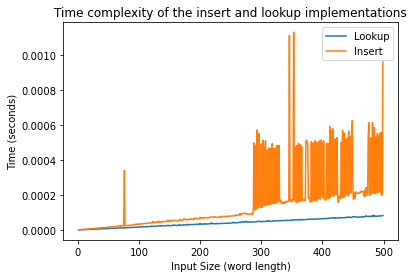

In [4]:
import matplotlib.pyplot as plt
import time
import random
from tqdm.notebook import tqdm

def time_complexity(input_size, trials, times_insert, times_lookup):
    
    word1 = ''
    word2 = ''
    word3 = ''
    word4 = ''
    word5 = ''
    word6 = ''
    word7 = ''
    word8 = ''
    word9 = ''
    word10 = ''
    total_insert = 0
    total_lookup = 0
    
    for i in range(input_size):
        
        #creates a random english word of length input_size
        word1 += chr(random.randint(65, 91))
        word2 += chr(random.randint(65, 91))
        word3 += chr(random.randint(65, 91))
        word4 += chr(random.randint(65, 91))
        word5 += chr(random.randint(65, 91))
        word6 += chr(random.randint(65, 91))
        word7 += chr(random.randint(65, 91))
        word8 += chr(random.randint(65, 91))
        word9 += chr(random.randint(65, 91))
        word10 += chr(random.randint(65, 91))
        
    for j in range(trials):
        #creates an empty trie tree
        trie = Trie([word2, word3, word4, word5, word6, word7, word8, word9, word10])
        
        start = time.process_time()
        trie.insert(word1)
        end = time.process_time()
        
        total_insert += end - start
        
        start = time.process_time()
        trie.lookup(word1)
        end = time.process_time()
        
        total_lookup += end - start
    
    times_insert.append(total_insert/trials)
    times_lookup.append(total_lookup/trials)

times_insert = []
times_lookup = []
input_size = []
N = 500

for k in tqdm(range(1, N)):
    input_size.append(k)
    time_complexity(k, 50, times_insert, times_lookup)

plt.plot(input_size, times_lookup, label = 'Lookup')
plt.plot(input_size, times_insert, label = 'Insert')
plt.legend()
plt.xlabel('Input Size (word length)')
plt.ylabel('Time (seconds)')
plt.title('Time complexity of the insert and lookup implementations')

Due to the fact that we must look through all the children nodes since this implementation is generalized to multiple alphabets, there is a nested for loop in my implementation which could affect the time complexity. If that was not the case and we simply used the english alphabet, we could make sure that the children attribute of a node would be a list of 26 lists, each for the letter it corresponds to in the alphabet. We would therefore check if the list represented by the current letter we are looking at is empty, which would guarantee constant time. I therefore decided to test this by creating a tree with 9 random words and seeing the time it takes to insert a 10th word and the time it takes to look for. The varying input size here is the word length, and we can see that these methods scale linearly with it, as expected (ignoring the weird spikes in the insert function), which means that my implementation was optimal (yay!).

### Q3—Find the $k$ most common words in a speech.

To mathematically determine the overall connotation of a speech, you might want to compute which words are most frequently used and then run a sentiment analysis. To this end, add a method to your code, `k_most_common()` that will take as an input $k$, an integer, and return a list of the $k$ most common words from the dictionary within the trie. The structure of the output list should be such that each entry is a tuple, the first element being the word and the second an integer of its frequency (see docstring if you’re confused).

> - To complete this exercise, you don’t have to bother with resolving ties (for example, if $k = 1$, but there are two most common words with the same frequency, you can return either of them). You can consider resolving ties as an extra challenge and let us know if you believe you solved it.
> - The test cell below downloads and preprocesses several real-world speeches, and then runs the k-most-common word analysis of them; your code should pass the tests. There are cleaner and more concise ways to write that testing code, but this way should be easily understandable. The tests contain the following speeches:
>> - Mehreen Faruqi - Black Lives Matter in Australia: https://bit.ly/CS110-Faruqi
>> - John F. Kennedy - The decision to go to the Moon: https://bit.ly/CS110-Kennedy
>> - Martin Luther King Jr. - I have a dream: https://bit.ly/CS110-King
>> - Greta Thunberg - UN Climate Summit message: https://bit.ly/CS110-Thunberg
>> - Vaclav Havel - Address to US Congress after the fall of Soviet Union: https://bit.ly/CS110-Havel
> - As usual, add at least **three** more tests, and **justify** why they are relevant to your code (feel free to find more speeches to start analysing too!).
> - Again, copy-paste your previous code and adjust to this *new version*. Note that the method is indented on purpose.
> - This task will probably require your nodes to store more information about the frequency of words inserted into the tree. One data structure that might be very useful to tackle the problem of traversing the tree and finding the most common words is heaps—you **are** allowed to use the `heapq` library or another alternative for this task.

In [5]:
class Node:
    """This class represents one node of a trie tree.
    
    Parameters
    ----------
    The parameters for the Node class are not predetermined.
    However, you will likely need to create one or more of them.
    """

    def __init__(self, letter):
        self.letter = letter
        self.children = []
        
        #turned this into a counter instead of a boolean
        self.is_a_word = 0
        
        #added a word attribute that stores the word that a node represents
        self.word = None
        
class Trie:
    """This class represents the entirety of a trie tree.
    
    Parameters
    ----------
    The parameters for Trie's __init__ are not predetermined.
    However, you will likely need one or more of them.    
    
    Methods
    -------
    insert(self, word)
        Inserts a word into the trie, creating nodes as required.
    lookup(self, word)
        Determines whether a given word is present in the trie.
    """
    
    def __init__(self, word_list = None):
        """Creates the Trie instance, inserts initial words if provided.
        
        Parameters
        ----------
        word_list : list
            List of strings to be inserted into the trie upon creation.
        """
        self.root = Node('')
        self.word_list = word_list
        
        if word_list:
            for word in self.word_list:
                self.insert(word)
                
            
    def insert(self, words):
        """Inserts a word into the trie, creating missing nodes on the go.
        
        Parameters
        ----------
        word : str
            The word to be inserted into the trie.
        """
        #if there is a single word, turn it into a list with one element
        if type(words) == str:
            words = [words]
        
        for word in words:
            #make the word lower case
            word = word.lower()
            #initialize the current node
            current_node = self.root

            #check every letter of the word
            for letter in range(len(word)):

                #initialize the letter not being a child of the current node
                already_a_child = False

                #check all the children of the current node
                for child in current_node.children:
                    #if a letter is already a child, update the already a child variable
                    #and check that node next
                    if word[letter] == child.letter:
                        already_a_child = True
                        current_node = child
                        continue

                #if it is not already a child, create a linear tree
                if already_a_child == False:
                    for other_letters in range(letter, len(word)):
                        new_node = Node(word[other_letters])
                        current_node.children.append(new_node)
                        current_node = new_node
                    break

            #the last node we added/checked will now be a word
            current_node.is_a_word += 1
            current_node.word = word

    def lookup(self, word):
        """Determines whether a given word is present in the trie.
        
        Parameters
        ----------
        word : str
            The word to be looked-up in the trie.
            
        Returns
        -------
        bool
            True if the word is present in trie; False otherwise.
            
        Notes
        -----
        Your trie should ignore whether a word is capitalized.
        E.g. trie.insert('Prague') should lead to trie.lookup('prague') = True
        """
        #make the word lower case
        word = word.lower()
        
        #initialize the current node
        current_node = self.root
        
        #check every letter of the word
        for letter in range(len(word)):
            
            #initialize the letter not being a child of the current node
            already_a_child = False
            
            #check all the children of the current node
            for child in current_node.children:
                #if a letter is already a child, check the next letter
                if word[letter] == child.letter:
                    already_a_child = True
                    current_node = child
                    continue
            
            #if a letter is not a child, the word is not in the tree
            if already_a_child == False:
                    return False
        
        #if all letters in the word were present, we just return whether the last letter
        #we checked was the end of a word based on the word_list
        if current_node.is_a_word == 0:
            return False
        
        return True

    def k_most_common(self, k):
        """Finds k words inserted into the trie most often.

        You will have to tweak some properties of your existing code,
        so that it captures information about repeated insertion.

        Parameters
        ----------
        k : int
            Number of most common words to be returned.

        Returns
        ----------
        list
            List of tuples.
            
            Each tuple entry consists of the word and its frequency.
            The entries are sorted by frequency.

        Example
        -------
        >>> print(trie.k_most_common(3))
        [(‘the’, 154), (‘a’, 122), (‘i’, 122)]
        
        I.e. the word ‘the’ has appeared 154 times in the inserted text.
        The second and third most common words both appeared 122 times.
        """

        #import the heapq module
        import heapq
        
        #initialize a list of all nodes
        nodes = []
        
        #create a function
        def get_children(current_node, lst):
            """Makes a list of all nodes

            Parameters
            ----------
            current_node : instance of Node class
                the node whose children we will add to the list
                
            lst: list
                the list where we will compile all the nodes
            """
            
            #base case would be that there are no children, and we would do nothing.
            #if that is not the case:
            if current_node.children != []:  
                
                #call the function recursively for each child of current_node
                for child in current_node.children:   
                    get_children(child, lst)
                    
                    #if the child is not empty, heappush it into lst
                    if child.word != None:
                        
                        #we multiply child.is_a_word by -1 because the heapq module only creates min heaps.
                        heapq.heappush(lst, (-1*child.is_a_word, child.word))
        
        #call the new function on the root node
        get_children(self.root, nodes)
        
        #if the tree is empty print an error message
        if len(nodes) == 0:
            return print('Error: the tree is empty!')
        
        #if there are less than k words, let k = total number of words
        if k > len(nodes):
            print('There are less than', k, 'words in the tree!')
            k = len(nodes)
            
        #create an empty list for the output
        output = []
        
        #pop k elements of the nodes list and put them into the output
        for i in range(k):
            ele = heapq.heappop(nodes)
            output.append((ele[1], -1*ele[0]))
        
        return output

In [6]:
!pip install requests

from requests import get
speakers = ['Faruqi', 'Kennedy', 'King', 'Thunberg', 'Havel']
bad_chars = [';', ',', '.', '?', '!', '_', 
             '[', ']', ':', '“', '”', '"', '–', '-']

for speaker in speakers:
    
    # download and clean up the speech from extra characters
    speech_full = get(f'https://bit.ly/CS110-{speaker}').text
    just_text = ''.join(c for c in speech_full if c not in bad_chars)
    without_newlines = ''.join(c if (c not in ['\n', '\r', '\t']) else " " for c in just_text)
    just_words = [word for word in without_newlines.split(" ") if word != ""]
    
    trie = Trie(just_words)
    # trie = Node(just_words)
    if speaker == 'Faruqi':
        Faruqi = [('the', 60), ('and', 45), ('to', 39), ('in', 37), 
                  ('of', 34), ('is', 25), ('that', 22), ('this', 21), 
                  ('a', 20), ('people', 20), ('has', 14), ('are', 13), 
                  ('for', 13), ('we', 13), ('have', 12), ('racism', 12), 
                  ('black', 11), ('justice', 9), ('lives', 9), ('police', 9)]
        assert trie.k_most_common(20) == Faruqi
    
    elif speaker == 'Kennedy':
        Kennedy = [('the', 117), ('and', 109), ('of', 93), ('to', 63), 
                   ('this', 44), ('in', 43), ('we', 43), ('a', 39), 
                   ('be', 30), ('for', 27), ('that', 27), ('as', 26), 
                   ('it', 24), ('will', 24), ('new', 22), ('space', 22), 
                   ('is', 21), ('all', 15), ('are', 15), ('have', 15), ('our', 15)]
        assert trie.k_most_common(21) == Kennedy
    
    elif speaker == 'Havel':
        Havel = [('the', 34), ('of', 23), ('and', 20), ('to', 15), 
                 ('in', 13), ('a', 12), ('that', 12), ('are', 9), 
                 ('we', 9), ('have', 8), ('human', 8), ('is', 8), 
                 ('you', 8), ('as', 7), ('for', 7), ('has', 7), ('this', 7), 
                 ('be', 6), ('it', 6), ('my', 6), ('our', 6), ('world', 6)]
        assert trie.k_most_common(22) == Havel
    
    elif speaker == 'King':
        King = [('the', 103), ('of', 99), ('to', 59), ('and', 54), ('a', 37), 
                ('be', 33), ('we', 29), ('will', 27), ('that', 24), ('is', 23), 
                ('in', 22), ('as', 20), ('freedom', 20), ('this', 20), 
                ('from', 18), ('have', 17), ('our', 17), ('with', 16), 
                ('i', 15), ('let', 13), ('negro', 13), ('not', 13), ('one', 13)]
        assert trie.k_most_common(23) == King
    
    elif speaker == 'Thunberg':
        Thunberg = [('you', 22), ('the', 20), ('and', 16), ('of', 15), 
                    ('to', 14), ('are', 10), ('is', 9), ('that', 9), 
                    ('be', 8), ('not', 7), ('with', 7), ('i', 6), 
                    ('in', 6), ('us', 6), ('a', 5), ('how', 5), ('on', 5), 
                    ('we', 5), ('all', 4), ('dare', 4), ('here', 4), 
                    ('my', 4), ('people', 4), ('will', 4)]
        assert trie.k_most_common(24) == Thunberg

In [7]:
#Test 1 - Empty tree
trie = Trie()
trie.k_most_common(2)

wordbank = 'Hey! Hey, how are you? I am great, how about you? I am great too!'.replace("!", "").replace("?", "").replace(".", "").replace(",", "").replace(";", "").split()

trie.insert(wordbank)

#Test 2 - Looking for 0 most common words
assert trie.k_most_common(0) == []

#Test 3 - Looking for more words than there are in the tree
assert trie.k_most_common(15) == [('am', 2), 
                                  ('great', 2), 
                                  ('hey', 2), 
                                  ('how', 2), 
                                  ('i', 2), 
                                  ('you', 2), 
                                  ('about', 1), 
                                  ('are', 1), 
                                  ('too', 1)]

#Test 4 - Looking for the most common words when there are ties
assert trie.k_most_common(1) == [('am', 2)]

Error: the tree is empty!
There are less than 15 words in the tree!


Here, I tested 4 different types of edge cases:
- **Test 1 - Empty tree:** If the tree is empty, the code should not break but instead return an error message letting the user know that the tree has not been populated.
- **Test 2 - Looking for 0 most common words:** Here I am making sure that if we are looking for the 0 most common words, the algorithm will return an empty list instead of breaking.
- **Test 3 - Looking for more words than there are in the tree:** This might happen often as someone might be counting all the words in a wordbank without accounting for repetitions, and ask for that number of most common words. In this case, the code should not break, return an error message AND a list in descending order of all the words, and the number of times they have been repeated.
- **Test 4 - Ties:** Lastly, I wanted to see what happens when there are ties. Here, there are 6 words that are repeated twice (the most amount of times). In this situation, it returns a random word (here it is 'am'), which could be considered a fault in this code. A better implementation would return the 6 words that are repeated twice.

## Q4–Implement an autocomplete with a Shakespearean dictionary!

Your task is to create a new `autocomplete()` method for your class, which will take a string as an input, and return another string as an output. If the string is not present in the tree, the output will be the same as the input. However, if the string is present in the trie tree, your task is to find the most common word to which it is a prefix and return that word instead (this can still turn out to be itself).

> - To make the task more interesting, use the test cell code to download and parse *The Complete Works of William Shakespeare*, and insert them into a trie. Your autocomplete should then pass the tests below. This is a *large* book, so the code might take a while to run...!
>- As usual, add at least **three** more test cases, and explain why they are appropriate (you can use input other than Shakespeare for them).
> - Make sure to include a minimum **100 word-summary critically evaluating** your autocomplete engine. How does it really work? Your critical reflection needs to precisely assess the role of the different data structures used by their algorithm and what is the overall complexity that the algorithm offers. Can we do better? If so, how and by how much?
> - Again, depending on how you choose to implement it, your `autocomplete()` might make calls to other helper methods. However, make sure that `autocomplete()` is the method exposed to the user in order to pass the tests.)*
>- *Note*: this is a manifestly frequentist approach to the problem, which is not the only method to solve this computational problem, and in many cases, not the ideal technique. However, if you were tasked with implementing something like [this](https://jqueryui.com/autocomplete/) or [this](https://xdsoft.net/jqplugins/autocomplete/), it might just be enough, so let’s give it a go. Good luck!*

In [8]:
class Node:
    """This class represents one node of a trie tree.
    
    Parameters
    ----------
    The parameters for the Node class are not predetermined.
    However, you will likely need to create one or more of them.
    """

    def __init__(self, letter):
        self.letter = letter
        self.children = []
        
        #turned this into a counter instead of a boolean
        self.is_a_word = 0
        
        #added a word attribute that stores the word that a node represents
        self.word = None
        
class Trie:
    """This class represents the entirety of a trie tree.
    
    Parameters
    ----------
    The parameters for Trie's __init__ are not predetermined.
    However, you will likely need one or more of them.    
    
    Methods
    -------
    insert(self, word)
        Inserts a word into the trie, creating nodes as required.
    lookup(self, word)
        Determines whether a given word is present in the trie.
    """
    
    def __init__(self, word_list = None):
        """Creates the Trie instance, inserts initial words if provided.
        
        Parameters
        ----------
        word_list : list
            List of strings to be inserted into the trie upon creation.
        """
        self.root = Node('')
        self.word_list = word_list
        
        if word_list:
            for word in self.word_list:
                self.insert(word)
                
            
    def insert(self, words):
        """Inserts a word into the trie, creating missing nodes on the go.
        
        Parameters
        ----------
        word : str
            The word to be inserted into the trie.
        """
        #if there is a single word, turn it into a list with one element
        if type(words) == str:
            words = [words]
        
        for word in words:
            #make the word lower case
            word = word.lower()
            #initialize the current node
            current_node = self.root

            #check every letter of the word
            for letter in range(len(word)):

                #initialize the letter not being a child of the current node
                already_a_child = False

                #check all the children of the current node
                for child in current_node.children:
                    #if a letter is already a child, update the already a child variable
                    #and check that node next
                    if word[letter] == child.letter:
                        already_a_child = True
                        current_node = child
                        continue

                #if it is not already a child, create a linear tree
                if already_a_child == False:
                    for other_letters in range(letter, len(word)):
                        new_node = Node(word[other_letters])
                        current_node.children.append(new_node)
                        current_node = new_node
                    break

            #the last node we added/checked will now be a word
            current_node.is_a_word += 1
            current_node.word = word

    def lookup(self, word):
        """Determines whether a given word is present in the trie.
        
        Parameters
        ----------
        word : str
            The word to be looked-up in the trie.
            
        Returns
        -------
        bool
            True if the word is present in trie; False otherwise.
            
        Notes
        -----
        Your trie should ignore whether a word is capitalized.
        E.g. trie.insert('Prague') should lead to trie.lookup('prague') = True
        """
        #make the word lower case
        word = word.lower()
        
        #initialize the current node
        current_node = self.root
        
        #check every letter of the word
        for letter in range(len(word)):
            
            #initialize the letter not being a child of the current node
            already_a_child = False
            
            #check all the children of the current node
            for child in current_node.children:
                #if a letter is already a child, check the next letter
                if word[letter] == child.letter:
                    already_a_child = True
                    current_node = child
                    continue
            
            #if a letter is not a child, the word is not in the tree
            if already_a_child == False:
                    return False
        
        #if all letters in the word were present, we just return whether the last letter
        #we checked was the end of a word based on the word_list
        if current_node.is_a_word == 0:
            return False
        
        return True
    
    #made a few edits to this
    def k_most_common(self, k, first_node):
        
        """Finds k words inserted into the trie most often.

        You will have to tweak some properties of your existing code,
        so that it captures information about repeated insertion.

        Parameters
        ----------
        k : int
            Number of most common words to be returned.
        
        first_node : instance of the Node class (initialized as the root)
            The node from which we will start looking for the k most common words

        Returns
        ----------
        list
            List of tuples.
            
            Each tuple entry consists of the word and its frequency.
            The entries are sorted by frequency.

        Example
        -------
        >>> print(trie.k_most_common(3))
        [(‘the’, 154), (‘a’, 122), (‘i’, 122)]
        
        I.e. the word ‘the’ has appeared 154 times in the inserted text.
        The second and third most common words both appeared 122 times.
        """
        
        #import the heapq module
        import heapq
        
        #initialize a list of all nodes
        nodes = []
        
        #if the first node is a word, heappush it into the list of nodes
        if first_node.word != None:
            heapq.heappush(nodes, (-1*first_node.is_a_word, first_node.word))
            
        #create a function
        def get_children(current_node, lst):
            """Makes a list of all nodes

            Parameters
            ----------
            current_node : instance of Node class
                the node whose children we will add to the list
                
            lst: list
                the list where we will compile all the nodes
            """
            
            #base case would be that there are no children, and we would do nothing.
            #if that is not the case:
            if current_node.children != []:  
                
                #call the function recursively for each child of current_node
                for child in current_node.children:   
                    get_children(child, lst)
                    
                    #if the child is not empty, heappush it into lst
                    if child.word != None:
                        
                        #we multiply child.is_a_word by -1 because the heapq module only creates min heaps.
                        heapq.heappush(lst, (-1*child.is_a_word, child.word))
        
        #call the new function on the first node
        get_children(first_node, nodes)
        
        #create an empty list for the output
        output = []
        
        #if the tree is empty print an error message
        if len(nodes) == 0:
            return print('Error: the tree is empty!')
        
        #if there are less than k words, let k = total number of words
        if k > len(nodes):
            print('There are less than', k, 'words in the tree!')
            k = len(nodes)
            
        #pop k elements of the nodes list and put them into the output
        for i in range(k):
            ele = heapq.heappop(nodes)
            output.append((ele[1], -1*ele[0]))
            
        return output

    def autocomplete(self, prefix):
        """Finds the most common word with the given prefix.

        You might want to reuse some functionality or ideas from Q4.

        Parameters
        ----------
        prefix : str
            The word part to be “autocompleted”.

        Returns
        ----------
        str
            The complete, most common word with the given prefix.
            
        Notes
        ----------
        The return value is equal to prefix if there is no valid word in the trie.
        The return value is also equal to prefix if prefix is the most common word.
        """
        
        #initialize the current node as the root
        current_node = self.root
        
        #check every letter in the prefix
        for letter in prefix:
            
            #save the current node
            previous_node = current_node
            
            #check every child of the current node
            for child in current_node.children:
                
                #if the current prefix letter is a child
                if letter == child.letter:
                    
                    #the current node is the child
                    current_node = child
                    
            #if the current node didn't get updated, the prefix is not in the tree so return it
            if current_node == previous_node:
                print('Error: This prefix is not present in the tree')
                return prefix
        
        #find the most common word after the last current node
        output = self.k_most_common(1, current_node)[0]
        
        #if it exists, return it
        if output:
            return output[0]
        
        return prefix

In [9]:
from requests import get
bad_chars = [';', ',', '.', '?', '!', '1', '2', '3', '4',
             '5', '6', '7', '8', '9', '0', '_', '[', ']']

SH_full = get('http://bit.ly/CS110-Shakespeare').text
SH_just_text = ''.join(c for c in SH_full if c not in bad_chars)
SH_without_newlines = ''.join(c if (c not in ['\n', '\r', '\t']) else " " for c in SH_just_text)
SH_just_words = [word for word in SH_without_newlines.split(" ") if word != ""]

SH_trie = Trie(SH_just_words)
assert SH_trie.autocomplete('hist') == 'history'
assert SH_trie.autocomplete('en') == 'enter'
assert SH_trie.autocomplete('cae') == 'caesar'
assert SH_trie.autocomplete('gen') == 'gentleman'
assert SH_trie.autocomplete('pen') == 'pen'
assert SH_trie.autocomplete('tho') == 'thou'
assert SH_trie.autocomplete('pent') == 'pentapolis'
assert SH_trie.autocomplete('petr') == 'petruchio'

In [10]:
#Test 1 - Empty tree
trie = Trie()
assert trie.autocomplete('re') == 're'

wordbank = 'read, real, revenge, repurpose, retire, reframe, rearrange, read'.replace(",", "").split()
trie.insert(wordbank)

#Test 2 - Tree where all words have the same prefix
assert trie.autocomplete('re') == 'read'

#Test 3 - Prefix is not present
assert trie.autocomplete('he') == 'he'

trie.insert('real')

#Test 4 - Two words have the same frequency
trie.autocomplete('re')

Error: This prefix is not present in the tree
Error: This prefix is not present in the tree


'read'

I added 4 tests above to make sure the implementation still works for edge cases:
- **Test 1 - Empty tree:** Just like previously, the code should not break if the tree is empty, it should instead just return the prefix that was attempted.
- **Test 2 - All words have the same prefix:** This is a rare situation but it might occur, and might cause issues if the implementation is incorrect. However, the method should still return the word that is repeated the most amount of times.
- **Test 3 - Prefix is not present:** If there are no words with the given prefix, the algorithm should return the same prefix and print an error message. This is important as one might have assumed that a prefix would be present when populating a tree with a large number of words but that was not the case.
- **Test 4 - Two words have the same frequency:** This is similar to the last test of the k_most_common method. In this situation, the algorithm will return a random one of the two words, which is acceptable for most application (there is a one in two chance that the given word will be the correct one). This could be improved by either returning the two (or more) top options or analyzing the context in which it is needed and returning the most appropriate one (but this would be quite difficult to do!).

## Q5–Reflecting on your LOs feedback

Include below the most critical feedback you have received from your PCW workbook or in-class polls. Explain, about 50 words, how you used that feedback to improve your LO applications in this assignment (please include a word count). Be as specific as possible.

In session 9, I received this feedback on my poll response: 

""The answer started strong, but we haven't implemented class inheritance in the second activity 2, so I am confused. We implemented inheritance in activity 1 when we discussed creating a class of sections. To add to this point, it would be essential to mention attributes and methods as crucial for the dynamics encoded in the class.

I strongly encourage you to continue playing with Python classes as we will be using OOP frequently throughout the course. Practice makes perfection!"

This feedback was essential to my understanding of Python classes, which was very important in this assignment. Indeed, I was quite confused on the meaning of inheritance (e.g. I would have thought that the Trie class inherits from the Node class, which is not the case!) and by looking back onto the activities I was able to clear up my confusion quite quickly. Additionally, without the added tip of playing with classes, I would never had practiced more in my free time and therefore my understanding of OOP would not have been developed enough to complete an assignment like this one.

Word count = 101

## Q6–HC applications 
Identify three HCs you have utilized in this assignment and reflect on your application in at least 50 words each (please include a word count).


**#analogies:** At the start of the assignment, I was very confused about how trie trees worked. I therefore started thinking about potential analogies I could make with the trie properties that would help me with the python implementation. The best one I came up was thinking of the tree as hierarchical organization and the nodes as individuals that work for them. In these there is one CEO (root node), that has a bunch of people that work right below them, who each have a bunch of people that work right below them, etc... This therefore represents a tree structure. I then thought of words in Tries as tasks that can be completed. Some specific tasks need a specific number of people within a specific branch of the organization to be completed (e.g. Creating an Instagram post: the CEO tells the Marketing director about the purpose of the post, who tells a designer some ideas so that they can create it, but for another task like simply brainstorming ideas, we would not need the designer). This set up (while a bit odd) allowed me to create a physical representation of an abstract data structure and it helped immensely with the python implementation. For example, in the insert method, I thought about how one would insert a task in an organization: the CEO would first ask if there is a director with the knowledge for it, if no one does, they would hire someone new (add a new letter); but if someone does (first letter is already in the tree), they would then address their subteam to check who can help, etc... The lookup method would check if a task could be completed given the current employees. The k_most_common method would check the k tasks that are completed the most amount of times in a year for example. After giving it a few employees, the autocomplete method would return the task that they most commonly work on together. By thinking about it this way, I was able to solve these problems quite easily, as I had an idea of what it would look like in real life.

Word count = 354

**#heuristics:** When working on the autocomplete function, I used one specific heuristic that really helped me understand how to go about creating it: working backwards. As an example of an autocomplete bot, I thought of the suggested words above the keyboard when typing messages on a phone. I thought about how they would know to give me these options given the prefix I wrote, and realized that they must have a data base of everything I had written on my phone (creepy!), and when I wrote a prefix, the phone searched for the words I used the most that contain this prefix. I therefore realized that I should reuse the k_most_common function with k = 1 on the subtree rooted at the last letter of the prefix. While this seems relatively simple, by starting with something physical that I knew about and going backwards, I was able to come up with an algorithmic strategy to solve the problem at hand.

Word count = 158

**#dataviz:** When working on the time complexity part of this assignment, I decided to create a data visualization to demonstrate how the time it takes to run the lookup and insert functions scale when increasing the word sizes. While I had already discussed this theoretically, creating this figure was important to my understanding of the practical implementation. Therefore, by creating this clear and detailed visualization (with axis labels, a title, and an appropriate legend), I was able to further prove my theoretical reasoning and demonstrate the efficiency of my implementation.

Word count = 89

Finally:

- Refer to the [CS110 course](https://drive.google.com/file/d/15qthc1zdBTcb7I0BhYjy0O0p186KwmG3/view?usp=sharing) guide on important notes about how to submit your assignment materials and the other sections that refer to the grading policy. Failure to include your Jupyter Notebook as part of your assignment resources will result in a 1️⃣ in #PythonProgramming.
- Before you turn this assignment in, make sure everything runs as expected and that there are no errors from running the code. Click on Kernel ➡️ Restart & Run All.

🏁 Congratulations on finishing the assignment!